# 作業目標:

反向傳播演算法 - 通過建立多層的神經網路, 了解中間層權重值的更新

# 作業重點:

建立一個3 層神經網路, 通過中間層參數的變數，以對更多關係的組合進行分組

syn1 權值矩陣將隱層的組合輸出映射到最終結果，而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，


In [1]:
import numpy as np
 
'''
定義數學函數:
y=f(x) = 1/(1+np.exp(-x)); #Sigmoid
dy/dx = df = x*(1-x) 

利用 deriv (derivative)做變數, 來分別指定方程式

'''    
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
 
    return 1/(1+np.exp(-x))

# 參數定義
# X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。
# y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

X = np.array([[0,0,1],
            [0,1,1],
            [1,0,1],
            [1,1,1]])
 
y = np.array([[0],
            [1],
            [1],
            [0]])
 
np.random.seed(1)
 
# randomly initialize our weights with mean 0 
# syn0 第一層權值 (輸入層 -> 隱藏層)
# syn1 第二層權值 (隱藏層 -> 輸出層)

syn0 = 2*np.random.random((3,4)) - 1 #3是固定的，因為輸入層有3個神經元，而4看有幾個隱藏層，是可以變動的
syn1 = 2*np.random.random((4,1)) - 1

syn0_history = [syn0]
syn1_history = [syn1]
 
for j in range(60000):
 
    # Feed forward through layers 0, 1, and 2
    # l0 網路第 1 層，即網路輸入層。
    # l1 網路第 2 層，常稱作隱藏層。
    # l2 假定為網路最後一層，隨著訓練進行，其輸出應該逐漸接近正確結果
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))
 
    # 如何計算損失: 
    # l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的損失。
    # l1_delta 該值為經確信度加權後的神經網路 l1 層的損失，除了確信損失很小時，它近似等於 l1_error 。
    
    '''
    作業: 
    新增
    l2_error 該值說明了神經網路預測時“損失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的損失，除了確信損失很小時，它近似等於預測輸出。
    '''
    '''
    損失計算: 數學函數輸出值減掉網路層的輸出值
    l2_error = ??
    '''
    l2_error = y- l2 

    if (j% 10000) == 0:
        print("L2_Error:" + str(np.mean(np.abs(l2_error))))
 
    '''
    可以參照 l1
    l2_delta = 損失跟輸出函數的乘積
    '''
    l2_delta= l2_error * nonlin(l2, deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    if (j% 10000) == 0:
        print("L1_Error:" + str(np.mean(np.abs(l2_error))))
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)
 
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
    syn1_history.append(syn1)
    syn0_history.append(syn0)

L2_Error:0.4964100319027255
L1_Error:0.4964100319027255
L2_Error:0.008584525653247157
L1_Error:0.008584525653247157
L2_Error:0.005789459862507806
L1_Error:0.005789459862507806
L2_Error:0.004629176776769983
L1_Error:0.004629176776769983
L2_Error:0.003958765280273646
L1_Error:0.003958765280273646
L2_Error:0.0035101225678616736
L1_Error:0.0035101225678616736


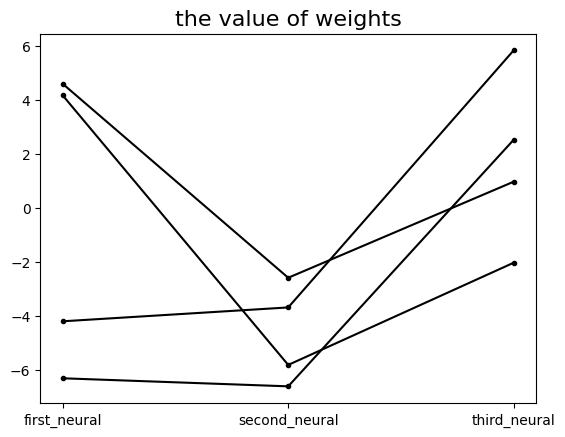

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(['first_neural','second_neural','third_neural'],syn0_history[0], '-o', ms=3, lw=1.5, color='black')
plt.title('the value of weights', fontsize=16)
plt.show()

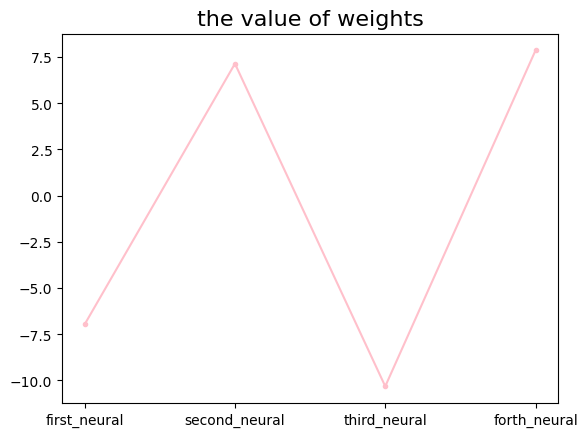

In [5]:
plt.plot(['first_neural','second_neural','third_neural','forth_neural'], syn1_history[0], '-o', ms=3, lw=1.5, color='pink') 
plt.title('the value of weights', fontsize=16)
plt.show()
#4*1 只會有一條

In [6]:
print("Output After Training (根據 L1):")
print(l1)

Output After Training (根據 L1):
[[7.26191199e-01 1.16411907e-01 9.26183940e-01 9.97110310e-01]
 [1.66762801e-01 3.92990161e-04 1.66519465e-02 8.96576847e-01]
 [9.96229372e-01 8.95211165e-01 2.23120442e-02 8.38385421e-01]
 [9.52239003e-01 2.48589483e-02 3.07990327e-05 1.15301801e-01]]


In [7]:
print("Output After Training (根據 L2):")
print(l2)
#接近真實結果，[0,1,1,0]

Output After Training (根據 L2):
[[0.00260572]
 [0.99672209]
 [0.99701711]
 [0.00386759]]
